# Coursera / IBM Data Science Professional Certificate - Capstone Project
## Week 4
### This project is utilized for the Coursera IBM Data Science Capstone Project. The project will focus on a (chosen) use-case to solve a problem using neighbourhood and location data at the city of Toronto, Canada.

# Introduction / Business Problem
## (Initial Research/Processing)

### Use-Case Scenario
#### The use-case scenario is to help a single family find the most favorable neighbourhoods to start a Thai restaurant, as well as, to find an affordable home location nearby the possible restaurant location in the Toronto area. 

### Audience
#### The target audience (or stakeholders) are mainly for individuals (in this case single-type families [1-4 members]) who want to start a food restaurant and move in the Toronto area. The use-case and dataset are also viable for individuals who want to start an ethnic-based food restaurant (in this use-case Thai [or Asian/Pacific Islander] cuisine).

#### The assessment and datasets provided can help determine the best possible neighbourhood locations and provide the stakeholder/s a set of choices based on their requirements. The assessment can also provide information what the state of restaurant businesses in a neighbourhood (e.g. provide what type of restaurants are in the neighborhood). 

# Data
## (Initial Research/Processing)

#### The data collected for this project was provided by the City of Toronto's Open Data Platform. Resources to the data will be provided in the final notebook/presentation/report. Collected data are as follows:

| Demographics | Economics | Environment | Health | Housing | Crime Rates | Safety | Total Population |
| ------------ | --------- | ----------- | ------ | ------- | ----------- | ------ | ---------------- |

#### Respectively, each dataset were collected on 2011 through 2020 - the majority of the data collected being on 2011. These datasets are processed (or quantified) by neighbourhood. The Demographics dataset include population, age range, and language used. The Economics dataset include home prices and total  businesses. The Environment dataset include pollutant scores and tree cover (trees available/saturation). The Health dataset include DineSafe inpections, health providers, and student nutrition scores. The Housing dataset also include home pricing. Both Crime Rates and Safety datasets are divided by some of the most common infractions - assault, auto theft, breaking and entering, robbery, theft, and homicide. The Total Population dataset include total population by year and population change rate.

#### The majority of the work done this week (Week 4), concentrated on data research, data cleaning, and data pre-processing. Data processing were evaluated on this notebook and Microsoft Excel. The datasets provided will be utilized to assess the quality of life in each neighbourhood. The Foursquare dataset will be utilized to determine where restaurants are located and what type of restaurants may be competitve in that neighbourhood.

#### Please note that the neighbourhood dataset may be different from Week 3. The datasets obtained from the City of Toronto reflects 140 neighbourhoods in the Toronto area. Neighbourhood names have been updated as well as each of these neighbourhoods have been assigned a "Neighbourhood Id". Some of the neighbourhoods may also be combined (or separated) with other neighbourhoods. In 2021, more neighbourhoods have been classified in Toronto - 158. The 158 neighbourhood dataset is not used in this assessment.

### NOTE: The assessment and analysis done below is only in the preliminary stage. More information will be processed and will be included in the final notebook/presentation/report.

#### Import libraries

In [1]:
# Import libraries
import numpy as np

import pandas as pd
from pandas.io.json import json_normalize # Transforming json file into a pandas dataframe library

import requests

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

#!pip install bs4
from bs4 import BeautifulSoup

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # Convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map rendering library

print('Libraries imported.')

#### Function calls

In [2]:
# function 1 - merge two DataFrames
#def merge_2_dfs_left(df_asgnmt, df_asgnmt_name, l_df, r_df, on_clmn):
#    df_asgnmt = l_df.merge(r_df,how='left', left_on=on_clmn, right_on=on_clmn)
#    print('Any null values?')
#    print(df_asgnmt.isnull().sum()) # Check for null values
#    print()
#    print("{} Dataframe shape is: {}".format(df_asgnmt_name, df_asgnmt.shape))
#    return df_asgnmt

# merge_2_dfs_left('main_merge_df', 'main_merge_df', neigh_up_df, geo_data_df, 'Postal Code')

In [ ]:
# function 2 - Select boroughs that have "Toronto" only
def tor_only(sub_data):
    return sub_data[sub_data['Borough'].str.contains('Toronto', na=False)]

#### Upload / Read csv files

In [3]:
# Upload csv files
neigh_up_df = pd.read_csv('toronto_neighbourhood_update.csv') # left DataFrame
geo_data_df = pd.read_csv('Geospatial_Coordinates.csv')# right DataFrame

# New data - from City of Toronto
tor_demo_df = pd.read_csv('toronto_demographics_2011.csv') # 2011 data
tor_econ_df = pd.read_csv('toronto_economics_2011.csv') # 2011 data
tor_envi_df = pd.read_csv('toronto_environment_2011.csv') # 2011 data
tor_heal_df = pd.read_csv('toronto_health_2011.csv') # 2011 data
tor_hous_df = pd.read_csv('toronto_housing_2011.csv') # 2011 data
tor_crim_df = pd.read_csv('toronto_neighbourhood_crime_rates_2020b.csv') # 2020 data
tor_safe_df = pd.read_csv('toronto_safety_2011.csv') # 2011 data
tor_popu_df = pd.read_csv('toronto_total_population_2016.csv') # 2016 data

### Data Cleaning / Pre-processing

#### Merge main DataFrame

In [4]:
# Join two different shaped DataFrames
# merge_df = neigh_up_df.merge(geo_data_df,how='left', left_on='Postal Code', right_on='Postal Code')
# Main merge
main_merge_df = neigh_up_df.merge(geo_data_df, how='left', left_on='Postal Code', right_on='Postal Code')

print('Any null values?')
print(main_merge_df.isnull().sum()) # Check for null values
print()
print("main_merge_df Dataframe shape is: {}".format(main_merge_df.shape))

main_merge_df

Any null values?
Neighbourhood Id    0
Neighbourhood       0
Borough             0
Postal Code         0
Latitude            0
Longitude           0
dtype: int64

main_merge_df Dataframe shape is: (140, 6)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054
...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476


#### Drop "Neighbourhood" column for each new data DataFrame

In [5]:
# Drop "Neigbourhood" column for each new data DataFrame
# Create list of each new data DataFrame
toronto_data_list = [tor_demo_df, 
                     tor_econ_df, 
                     tor_envi_df, 
                     tor_heal_df, 
                     tor_hous_df, 
                     tor_crim_df, 
                     tor_safe_df, 
                     tor_popu_df]

# for loop - Delete "Neighbourhood" column for each DataFrame in the list
for df in toronto_data_list:
    df.pop('Neighbourhood')

# List comprehension
#[df.pop('Neighbourhood') for df in toronto_data_list]

#### Merge subset DataFrame - Demographics (All Neighbourhoods)

In [6]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_demo_df
sub_demo_df = main_merge_df.merge(tor_demo_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_demo_df.isnull().sum()) # Check for null values
print()
print("sub_demo_df Dataframe shape is: {}".format(sub_demo_df.shape))

sub_demo_df

Any null values?
Neighbourhood Id                 0
Neighbourhood                    0
Borough                          0
Postal Code                      0
Latitude                         0
Longitude                        0
Total Area                       0
Total Population                 0
Pop - Males                      0
Pop - Females                    0
Pop 0 - 4 years                  0
Pop 5 - 9 years                  0
Pop 10 - 14 years                0
Pop 15 -19 years                 0
Pop 20 - 24 years                0
Pop  25 - 29 years               0
Pop 30 - 34 years                0
Pop 35 - 39 years                0
Pop 40 - 44 years                0
Pop 45 - 49 years                0
Pop 50 - 54 years                0
Pop 55 - 59 years                0
Pop 60 - 64 years                0
Pop 65 - 69 years                0
Pop 70 - 74 years                0
Pop 75 - 79 years                0
Pop 80 - 84 years                0
Pop 85 years and over            0
Sen

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Total Area,Total Population,Pop - Males,Pop - Females,...,Language - Chinese,Language - Italian,Language - Korean,Language - Persian (Farsi),Language - Portuguese,Language - Russian,Language - Spanish,Language - Tagalog,Language - Tamil,Language - Urdu
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,30.09,34100,17095,17000,...,475,925,95,160,205,15,1100,850,715,715
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,4.60,32790,16015,16765,...,275,750,60,350,115,50,820,345,1420,1075
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,3.40,10140,4920,5225,...,95,705,35,115,105,15,570,130,120,300
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,2.50,10485,5035,5455,...,95,475,30,95,145,30,700,180,70,215
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,2.90,9550,4615,4935,...,90,510,55,285,80,30,670,195,60,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,9.60,26550,12560,14000,...,575,330,60,445,90,65,435,985,810,425
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,12.20,53350,26005,27330,...,3560,430,125,1070,180,70,615,2075,4665,1740
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,3.20,22830,10580,12240,...,915,255,55,305,90,30,325,1540,2740,340
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,3.10,16615,7825,8790,...,330,160,35,525,50,40,250,505,1625,865


#### Merge subset DataFrame - Economics (All Neighbourhoods)

In [7]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_econ_df
sub_econ_df = main_merge_df.merge(tor_econ_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_econ_df.isnull().sum()) # Check for null values
print()
print("sub_econ_df Dataframe shape is: {}".format(sub_econ_df.shape))

sub_econ_df

Any null values?
Neighbourhood Id                0
Neighbourhood                   0
Borough                         0
Postal Code                     0
Latitude                        0
Longitude                       0
Businesses                      0
Child Care Spaces               0
Debt Risk Score                 0
Home Prices                     0
Local Employment                0
Social Assistance Recipients    0
dtype: int64

sub_econ_df Dataframe shape is: (140, 12)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,2463,195,719,317508,58271,2912
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,271,60,687,251119,3244,6561
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,217,25,718,414216,1311,1276
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,144,75,721,392271,1178,1323
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,67,60,692,233832,903,1683
...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,424,153,706,308229,4500,4974
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,1073,214,723,316584,16190,6747
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,296,143,705,274020,2351,4171
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,228,217,699,356096,1851,4133


#### Merge subset DataFrame - Environment (All Neighbourhoods)

In [8]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_envi_df
sub_envi_df = main_merge_df.merge(tor_envi_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_envi_df.isnull().sum()) # Check for null values
print()
print("sub_envi_df Dataframe shape is: {}".format(sub_envi_df.shape))

sub_envi_df

Any null values?
Neighbourhood Id                        0
Neighbourhood                           0
Borough                                 0
Postal Code                             0
Latitude                                0
Longitude                               0
Green Rebate Programs                   0
Green Spaces                            0
Pollutant Carcinogenic TEP Score        0
Pollutant Non-Carcinogenic TEP Score    0
Pollutants Released to Air              0
Tree Cover                              0
dtype: int64

sub_envi_df Dataframe shape is: (140, 12)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,250,1.048870,29.76,2015.00,31,1.303945e+06
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,118,0.939108,0.00,0.00,0,1.499130e+06
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,121,0.240663,0.00,37632.00,35920,7.563823e+05
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,73,0.730090,0.00,309.00,309,9.975108e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,338,1.993607,104759.13,54076528.30,371626,3.403338e+06
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,600,1.354012,0.00,17463.80,2357,2.746208e+06
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,209,0.233049,27469.60,901516.80,4410,6.563212e+05
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,115,0.286328,0.00,0.00,0,1.127497e+06


#### Merge subset DataFrame - Health (All Neighbourhoods)

In [9]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_heal_df
sub_heal_df = main_merge_df.merge(tor_heal_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_heal_df.isnull().sum()) # Check for null values
print()
print("sub_heal_df Dataframe shape is: {}".format(sub_heal_df.shape))

sub_heal_df

Any null values?
Neighbourhood Id              0
Neighbourhood                 0
Borough                       0
Postal Code                   0
Latitude                      0
Longitude                     0
Breast Cancer Screenings      0
Cervical Cancer Screenings    0
DineSafe Inspections          0
Female Fertility              0
Health Providers              0
Premature Mortality           0
Student Nutrition             0
dtype: int64

sub_heal_df Dataframe shape is: (140, 13)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Breast Cancer Screenings,Cervical Cancer Screenings,DineSafe Inspections,Female Fertility,Health Providers,Premature Mortality,Student Nutrition
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,57.02,60.52,10,59.923279,101,223.8,1105
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,50.14,55.75,2,64.410021,44,242.6,5132
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,55.22,61.15,4,57.480863,14,226.1,950
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,54.28,64.69,0,45.586298,6,282.7,180
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,55.15,61.54,1,61.392833,1,163.6,2030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,58.00,61.50,1,48.366013,33,248.9,1725
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,56.83,60.67,6,55.628495,93,187.8,5690
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,56.70,59.10,8,53.686827,19,214.7,1005
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,54.67,59.76,4,55.695142,24,239.2,2157


#### Merge subset DataFrame - Housing (All Neighbourhoods)

In [10]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_hous_df
sub_hous_df = main_merge_df.merge(tor_hous_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_hous_df.isnull().sum()) # Check for null values
print()
print("sub_hous_df Dataframe shape is: {}".format(sub_hous_df.shape))

sub_hous_df

Any null values?
Neighbourhood Id                           0
Neighbourhood                              0
Borough                                    0
Postal Code                                0
Latitude                                   0
Longitude                                  0
Home Prices                                0
Mid-Century Highrise Households            0
Mid-Century Highrise Population            0
Percent Mid-Century Highrise Households    0
Percent Mid-Century Highrise Population    0
Rent Bank Applicants                       0
Social Housing Turnover                    0
Social Housing Units                       0
Social Housing Waiting List                0
dtype: int64

sub_hous_df Dataframe shape is: (140, 15)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Percent Mid-Century Highrise Households,Percent Mid-Century Highrise Population,Rent Bank Applicants,Social Housing Turnover,Social Housing Units,Social Housing Waiting List
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,317508,690,1810,6.8,5.3,38,0.312500,952,557
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,251119,4110,13395,42.9,40.9,41,7.000000,1146,1049
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,414216,430,1260,13.4,12.4,7,1.333333,447,270
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,392271,600,1050,15.2,10.0,19,4.200000,432,186
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,233832,870,2305,27.3,24.1,14,1.000000,463,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,308229,3010,5880,31.1,22.1,22,8.400000,2089,725
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,316584,5090,14870,27.8,27.9,26,4.911765,2660,1306
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,274020,3935,10105,48.8,44.3,33,2.588235,865,688
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,356096,2905,7860,49.2,47.3,22,4.400000,922,683


#### Merge subset DataFrame - Crime Rates (All Neighbourhoods)

In [11]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_crim_df
sub_crim_df = main_merge_df.merge(tor_crim_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_crim_df.isnull().sum()) # Check for null values
print()
print("sub_crim_df Dataframe shape is: {}".format(sub_crim_df.shape))

sub_crim_df

Any null values?
Neighbourhood Id               0
Neighbourhood                  0
Borough                        0
Postal Code                    0
Latitude                       0
Longitude                      0
F2020_Population_Projection    0
Assault_2014                   0
Assault_2015                   0
Assault_2016                   0
Assault_2017                   0
Assault_2018                   0
Assault_2019                   0
Assault_2020                   0
AutoTheft_2014                 0
AutoTheft_2015                 0
AutoTheft_2016                 0
AutoTheft_2017                 0
AutoTheft_2018                 0
AutoTheft_2019                 0
AutoTheft_2020                 0
BreakAndEnter_2014             0
BreakAndEnter_2015             0
BreakAndEnter_2016             0
BreakAndEnter_2017             0
BreakAndEnter_2018             0
BreakAndEnter_2019             0
BreakAndEnter_2020             0
Robbery_2014                   0
Robbery_2015              

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,F2020_Population_Projection,Assault_2014,Assault_2015,Assault_2016,...,Homicide_2018,Homicide_2019,Homicide_2020,Shootings_2014,Shootings_2015,Shootings_2016,Shootings_2017,Shootings_2018,Shootings_2019,Shootings_2020
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,37133,289,307,296,...,2,2,3,5,7,12,11,16,19,7
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,35772,239,236,271,...,2,3,2,5,11,6,6,15,12,16
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,10948,61,56,46,...,2,0,0,0,1,2,2,1,3,1
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,11095,49,62,72,...,0,2,0,1,0,4,2,3,5,1
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,10045,45,50,69,...,0,0,0,1,4,3,6,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,29669,347,395,422,...,1,2,2,0,1,6,3,5,8,7
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,58109,351,396,365,...,0,0,2,2,6,4,7,12,15,15
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,24885,189,182,209,...,1,2,2,1,2,3,10,1,6,11
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,18116,161,153,191,...,0,0,1,1,2,3,5,4,6,2


#### Merge subset DataFrame - Safety (All Neighbourhoods)

In [12]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_safe_df
sub_safe_df = main_merge_df.merge(tor_safe_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_safe_df.isnull().sum()) # Check for null values
print()
print("sub_safe_df Dataframe shape is: {}".format(sub_safe_df.shape))

sub_safe_df

Any null values?
Neighbourhood Id               0
Neighbourhood                  0
Borough                        0
Postal Code                    0
Latitude                       0
Longitude                      0
Arsons                         0
Assaults                       0
Break & Enters                 0
Drug Arrests                   0
Fire Medical Calls             0
Fire Vehicle Incidents         0
Fires & Fire Alarms            0
Hazardous Incidents            0
Murders                        0
Robberies                      0
Sexual Assaults                0
Thefts                         0
Total Major Crime Incidents    0
Vehicle Thefts                 0
dtype: int64

sub_safe_df Dataframe shape is: (140, 20)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,3,316,61,90,1016,59,361,176,1,78,75,7,690,62
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,0,85,36,16,323,48,90,34,0,17,24,2,192,12
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,0,59,32,15,305,34,94,55,1,16,20,3,164,18
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,1,77,25,14,321,71,107,43,0,23,5,19,185,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,3,387,102,87,1145,78,338,142,1,71,52,3,749,46
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,2,412,128,77,1469,219,504,223,3,107,29,7,808,45
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,0,239,88,48,720,76,223,111,1,66,17,10,492,23
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,1,226,93,31,652,35,180,94,1,62,31,3,474,27


#### Merge subset DataFrame - Population (All Neighbourhoods)

In [13]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_popu_df
sub_popu_df = main_merge_df.merge(tor_popu_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

print('Any null values?')
print(sub_popu_df.isnull().sum()) # Check for null values
print()
print("sub_popu_df Dataframe shape is: {}".format(sub_popu_df.shape))

sub_popu_df

Any null values?
Neighbourhood Id    0
Neighbourhood       0
Borough             0
Postal Code         0
Latitude            0
Longitude           0
Pop2016             0
Pop2011             0
PopChg11t16         0
dtype: int64

sub_popu_df Dataframe shape is: (140, 9)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Pop2016,Pop2011,PopChg11t16
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,"33,312","34,100",-2.30%
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,"32,954","32,788",0.50%
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,"10,360","10,138",2.20%
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,"10,529","10,488",0.40%
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,"9,456","9,550",-1.00%
...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711,"27,392","26,547",3.20%
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917,"53,485","53,350",0.30%
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476,"22,776","22,829",-0.20%
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476,"16,724","16,609",0.70%


### Data Pre-exploration

#### Select boroughs with "Toronto" in main DataFrame

In [15]:
# Select boroughs that have "Toronto" only
# Main
toronto_area = main_merge_df[main_merge_df['Borough'].str.contains('Toronto', na=False)]

# Subset
print(toronto_area.shape)
toronto_area.head()

(40, 6)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude
62,63,The Beaches,East Toronto,M4E,43.676357,-79.293031
63,64,Woodbine Corridor,East Toronto,M4E,43.676357,-79.293031
64,65,Greenwood-Coxwell,East Toronto,M4L,43.668999,-79.315572
65,66,Danforth,East Toronto,M4C,43.695344,-79.318389
66,67,Playter Estates-Danforth,East Toronto,M4K,43.679557,-79.352188


#### Select boroughs with "Toronto" in subset DataFrames

In [30]:
# Select boroughs that have "Toronto" only
# Create list of each new data DataFrame
toronto_sub_data_list = [sub_demo_df, 
                         sub_econ_df, 
                         sub_envi_df, 
                         sub_heal_df, 
                         sub_hous_df, 
                         sub_crim_df, 
                         sub_safe_df, 
                         sub_popu_df]

# Subset    
sub_demo_df_2 = tor_only(toronto_sub_data_list[0])
sub_econ_df_2 = tor_only(toronto_sub_data_list[1])
sub_envi_df_2 = tor_only(toronto_sub_data_list[2])
sub_heal_df_2 = tor_only(toronto_sub_data_list[3])
sub_hous_df_2 = tor_only(toronto_sub_data_list[4])
sub_crim_df_2 = tor_only(toronto_sub_data_list[5])
sub_safe_df_2 = tor_only(toronto_sub_data_list[6])
sub_popu_df_2 = tor_only(toronto_sub_data_list[7])

#### KMeans Clustering - Choose appropriate cluster number

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

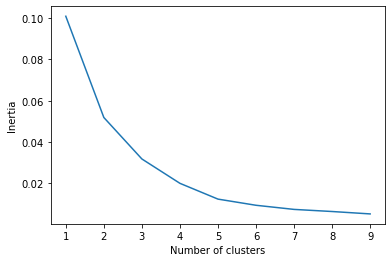

In [18]:
# Select appropriate cluster number
choose_k = toronto_area.drop(['Neighbourhood Id', 'Neighbourhood', 'Postal Code', 'Borough'], 1)

inertias = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(choose_k)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### KMeans Clustering - Create toronto_area DataFrame

In [20]:
# Create new dataframe
toronto_cluster = toronto_area
print("New Toronto dataframe shape: {}".format(toronto_cluster.shape))
print(type(toronto_cluster))

# KMeans clustering
k = 5 # Manually set from above 
toronto_clustering = toronto_cluster.drop(['Neighbourhood Id', 'Neighbourhood', 'Postal Code', 'Borough'], 1)
kmeans = KMeans(n_clusters = k, random_state = 0).fit(toronto_clustering)
# kmeans.labels_

# New dataframe - Create new dataframe to include cluster label
toronto_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

# Space
print()

toronto_cluster

New Toronto dataframe shape: (40, 6)
<class 'pandas.core.frame.DataFrame'>



,Cluster Labels,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude
62,1,63,The Beaches,East Toronto,M4E,43.676357,-79.293031
63,1,64,Woodbine Corridor,East Toronto,M4E,43.676357,-79.293031
64,1,65,Greenwood-Coxwell,East Toronto,M4L,43.668999,-79.315572
65,1,66,Danforth,East Toronto,M4C,43.695344,-79.318389
66,4,67,Playter Estates-Danforth,East Toronto,M4K,43.679557,-79.352188
67,4,68,North Riverdale,East Toronto,M4K,43.679557,-79.352188
68,4,69,Blake-Jones,East Toronto,M4J,43.685347,-79.338106
69,4,70,South Riverdale,East Toronto,M4K,43.679557,-79.352188
70,4,71,Cabbagetown-South St.James Town,Downtown Toronto,M4X,43.667967,-79.367675
71,4,72,Regent Park,Downtown Toronto,M5A,43.654260,-79.360636


#### Visualize Toronto - 5 cluster neighbourhood -- Set parameters

In [21]:
# Example: map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# Verify variables chosen
print('Chosen latitude variable: {}'.format(latitude))
print('Chosen longitude variable: {}'.format(longitude))
print('Chosen k cluster variable: {}'.format(k))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.
Chosen latitude variable: 43.6534817
Chosen longitude variable: -79.3839347
Chosen k cluster variable: 5


#### Visualize Toronto - 5 cluster neighbourhood -- Create map

#### NOTE: The map has less markers is due to the overlay of neighbourhoods in the same (latitude and longitude) coordinates compared to the output shape provided by the toronto_cluster DataFrame.

In [28]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# Set color scheme for the clusters
kclusters = k # Manually set from above
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 0.5, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_cluster['Latitude'], toronto_cluster['Longitude'], toronto_cluster['Neighbourhood'], toronto_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### NOTE: The Folium Map may not render on GitHub. I have added images in the repository. 
##### https://github.com/zer0-zer0-edward/Coursera_Capstone
##### Image is https://github.com/zer0-zer0-edward/Coursera_Capstone/blob/main/202104523_Capstone_Project_Week-4_Folium_1.png

#### Foursquare Processing - API parameters

In [32]:
# Foursquare API
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50 # 100 - Default Foursquare API limit value

#### Foursquare Processing - Choose Downtown Toronto neighbourhood -- Reset index

In [38]:
# Chosen Neighborhood in Downtown Toronto Borough
toronto_neighborhood = toronto_cluster

# Reset DataFrame index
toronto_neighborhood.reset_index(drop=True, inplace=True) # Reset index from previous query
toronto_neighborhood.pop('index')

0      62
1      63
2      64
3      65
4      66
5      67
6      68
7      69
8      70
9      71
10     72
11     73
12     74
13     75
14     76
15     77
16     78
17     79
18     80
19     81
20     82
21     83
22     84
23     85
24     86
25     87
26     88
27     92
28     93
29     94
30     95
31     96
32     97
33     98
34     99
35    100
36    101
37    102
38    103
39    104
Name: index, dtype: int64

#### Foursquare Processing - Choose Downtown Toronto neighbourhood -- Waterfront Communities-The Island

In [41]:
# Check out neighbouhood - Waterfront Communities-The Island
toronto_neighborhood.loc[toronto_neighborhood['Neighbourhood'] == 'Waterfront Communities-The Island']

,Cluster Labels,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude
14,2,77,Waterfront Communities-The Island,Downtown Toronto,M5J,43.640816,-79.381752


#### Foursquare Processing - Choose Downtown Toronto neighbourhood -- Set neighbourhood coordinates

In [46]:
# Specify coordinates
neighborhood_latitude = toronto_neighborhood.loc[14, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_neighborhood.loc[14, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_neighborhood.loc[14, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Waterfront Communities-The Island are 43.6408157, -79.3817523.


#### Foursquare Processing - Search query for Thai categories

In [47]:
search_query = 'Thai'
radius = 100
print(search_query + ' .... OK!')

Thai .... OK!


#### Foursquare Processing - Search query for Thai categories -- search venue format

In [48]:
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # Display URL

'https://api.foursquare.com/v2/venues/search?&client_id=YNA4BWHRXA31H5DSRN2ATW54UWJEDLAAIHWFGO2YUKBL0YBQ&client_secret=IEZKA1REZRJLYDMZM2H1Q4KJ2OYCEWU4BVA0YLOL534VIUBI&v=20180605&ll=43.6408157,-79.3817523&radius=100&limit=50'

In [50]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60aa88e7cd93772bb0c6a29c'},
 'response': {'venues': [{'id': '4caaabd8f47ea143763b8521',
    'name': "Longo's Maple Leaf Square",
    'location': {'address': '15 York St.',
     'crossStreet': 'enter on Bremner',
     'lat': 43.64251679604069,
     'lng': -79.38139301653129,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.64251679604069,
       'lng': -79.38139301653129}],
     'distance': 191,
     'postalCode': 'M5J 0A3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['15 York St. (enter on Bremner)',
      'Toronto ON M5J 0A3',
      'Canada']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
      'name': 'Supermarket',
      'pluralName': 'Supermarkets',
      'shortName': 'Supermarket',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1621788903',
    

#### Foursquare Processing - Create DataFrame from "results" (JSON data) ouput

In [51]:
# Code within this is cell is from lesson - Mofied as needed
# Assign relevant part of JSON to venues
venues = results['response']['venues']

# Transform venues into a dataframe
# dataframe = json_normalize(venues)
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4caaabd8f47ea143763b8521,Longo's Maple Leaf Square,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1621788903,False,15 York St.,enter on Bremner,43.642517,-79.381393,"[{'label': 'display', 'lat': 43.64251679604069...",191,M5J 0A3,CA,Toronto,ON,Canada,"[15 York St. (enter on Bremner), Toronto ON M5...",NaN,NaN
1,4be046e0c9eac928e64a5a6b,Bell,"[{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'M...",v-1621788903,False,"1 York St, Level 2-212",NaN,43.641718,-79.380240,"[{'label': 'display', 'lat': 43.641718, 'lng':...",157,M5J 0B6,CA,Toronto,ON,Canada,"[1 York St, Level 2-212, Toronto ON M5J 0B6, C...",NaN,NaN
2,58ddee1688cfcc4ac9068341,8 York Street,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1621788903,False,15 York St,NaN,43.642060,-79.380814,"[{'label': 'display', 'lat': 43.64206, 'lng': ...",157,M5J 0A3,CA,Toronto,ON,Canada,"[15 York St, Toronto ON M5J 0A3, Canada]",NaN,NaN
3,5b8c8ef9a0215b002cd530a1,Ten York,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1621788903,False,10 York street,NaN,43.641125,-79.381022,"[{'label': 'display', 'lat': 43.641125, 'lng':...",68,M5J 0C8,CA,Toronto,ON,Canada,"[10 York street, Toronto ON M5J 0C8, Canada]",NaN,NaN
4,4d6033c0d7206ea8231af2f1,Ice Condominiums,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1621788903,False,12 & 14 York St,at Lake Shore Blvd W,43.641663,-79.381695,"[{'label': 'display', 'lat': 43.64166251311343...",94,M5J 0A9,CA,NaN,NaN,Canada,"[12 & 14 York St (at Lake Shore Blvd W), M5J 0...",NaN,NaN


#### Foursquare Processing - Subset / Clean DataFrame

In [52]:
# Code within this is cell is from lesson - Mofied as needed
# Keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# Clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Longo's Maple Leaf Square,Supermarket,15 York St.,enter on Bremner,43.642517,-79.381393,"[{'label': 'display', 'lat': 43.64251679604069...",191,M5J 0A3,CA,Toronto,ON,Canada,"[15 York St. (enter on Bremner), Toronto ON M5...",NaN,4caaabd8f47ea143763b8521
1,Bell,Mobile Phone Shop,"1 York St, Level 2-212",NaN,43.641718,-79.380240,"[{'label': 'display', 'lat': 43.641718, 'lng':...",157,M5J 0B6,CA,Toronto,ON,Canada,"[1 York St, Level 2-212, Toronto ON M5J 0B6, C...",NaN,4be046e0c9eac928e64a5a6b
2,8 York Street,Residential Building (Apartment / Condo),15 York St,NaN,43.642060,-79.380814,"[{'label': 'display', 'lat': 43.64206, 'lng': ...",157,M5J 0A3,CA,Toronto,ON,Canada,"[15 York St, Toronto ON M5J 0A3, Canada]",NaN,58ddee1688cfcc4ac9068341
3,Ten York,Residential Building (Apartment / Condo),10 York street,NaN,43.641125,-79.381022,"[{'label': 'display', 'lat': 43.641125, 'lng':...",68,M5J 0C8,CA,Toronto,ON,Canada,"[10 York street, Toronto ON M5J 0C8, Canada]",NaN,5b8c8ef9a0215b002cd530a1
4,Ice Condominiums,Residential Building (Apartment / Condo),12 & 14 York St,at Lake Shore Blvd W,43.641663,-79.381695,"[{'label': 'display', 'lat': 43.64166251311343...",94,M5J 0A9,CA,NaN,NaN,Canada,"[12 & 14 York St (at Lake Shore Blvd W), M5J 0...",NaN,4d6033c0d7206ea8231af2f1


#### Foursquare Processing - Check filtered venue categories

In [53]:
# Check values in the "categories" column
dataframe_filtered['categories'].value_counts()

Residential Building (Apartment / Condo)    8
Supermarket                                 2
Light Rail Station                          2
Coffee Shop                                 2
Parking                                     2
Doctor's Office                             2
Sports Bar                                  1
Office                                      1
Tech Startup                                1
Middle Eastern Restaurant                   1
Winery                                      1
Church                                      1
Mobile Phone Shop                           1
Gastropub                                   1
Wine Shop                                   1
Café                                        1
Gym                                         1
Bike Rental / Bike Share                    1
Eastern European Restaurant                 1
Fried Chicken Joint                         1
Pet Store                                   1
Indian Restaurant                 

#### Foursquare Processing - Assign food restaurant categories

#### NOTE: Only categories with "restaurant" or possible food competition in the same cuisine were chosen.

In [54]:
# Example - restaurant = dataframe_filtered[dataframe_filtered['categories'] == 'Restaurant']
restaurant_1 = dataframe_filtered[dataframe_filtered['categories'] == 'Middle Eastern Restaurant']
restaurant_2 = dataframe_filtered[dataframe_filtered['categories'] == 'Gastropub']
restaurant_3 = dataframe_filtered[dataframe_filtered['categories'] == 'Eastern European Restaurant']
restaurant_4 = dataframe_filtered[dataframe_filtered['categories'] == 'Indian Restaurant']
restaurant_5 = dataframe_filtered[dataframe_filtered['categories'] == 'Food Truck']
restaurant_6 = dataframe_filtered[dataframe_filtered['categories'] == 'Pizza Place']

#### Foursquare Processing - Visualize food restaurant locations

In [55]:
# Code within this is cell is from lesson - Mofied as needed
venues_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# Add a red circle marker to represent the Waterfront Communities-The Island Neighborhood
folium.CircleMarker(
    [neighborhood_latitude, neighborhood_longitude],
    radius=10,
    color='red',
    popup='Waterfront Communities-The Island Neighborhood',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Add restaurant 1 as a blue circle marker
for lat, lng, label in zip(restaurant_1.lat, restaurant_1.lng, restaurant_1.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Add restaurant 2 as a blue circle marker
for lat, lng, label in zip(restaurant_2.lat, restaurant_2.lng, restaurant_2.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)    

# Add restaurant 3 as a blue circle marker
for lat, lng, label in zip(restaurant_3.lat, restaurant_3.lng, restaurant_3.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Add restaurant 4 as a blue circle marker
for lat, lng, label in zip(restaurant_4.lat, restaurant_4.lng, restaurant_4.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Add restaurant 5 as a blue circle marker
for lat, lng, label in zip(restaurant_5.lat, restaurant_5.lng, restaurant_5.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)    

# Add restaurant 6 as a blue circle marker
for lat, lng, label in zip(restaurant_6.lat, restaurant_6.lng, restaurant_6.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# Display map
venues_map

##### NOTE: The Folium Map may not render on GitHub. I have added images in the repository. 
##### https://github.com/zer0-zer0-edward/Coursera_Capstone
##### Image is https://github.com/zer0-zer0-edward/Coursera_Capstone/blob/main/202104523_Capstone_Project_Week-4_Folium_2.png

### NOTE: The assessment and analysis done above is only in the preliminary stage. More information will be processed and will be included in the final notebook/presentation/report.